<a href="https://colab.research.google.com/github/inyminymoe/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D(%EC%A4%91%EA%B0%84%EA%B3%BC%EC%A0%9C%EB%AC%BC)_%EA%B0%95%EC%9D%B8%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1: API 호출 및 데이터 수집**

In [4]:
# 설치 및 import
!pip install pandas requests
!apt-get -qq -y install fonts-nanum

import requests
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# 폰트 경고 무시
warnings.filterwarnings('ignore', category=UserWarning)

try:
    plt.rcParams['font.family'] = 'NanumGothic'
except:
    pass

plt.rcParams['axes.unicode_minus'] = False

print("폰트 설정 완료")

폰트 설정 완료


In [17]:
# 데이터 파악
df_raw = pd.DataFrame(all_data)
print("전체 행수:", len(df_raw))
display(df_raw.head())

print("<실제 컬럼 목록>")
print(sorted(df_raw.columns.tolist()))

for col in ["MM_TYPE"]:
    if col in df_raw.columns:
        print(f"\n< {col} 유니크 값(상위 30개) >")
        vc = df_raw[col].value_counts(dropna=False)
        display(vc.head(30))
    else:
        print(f"\n< {col} 컬럼 없음 >")


df = df_raw.copy()

# YEAR/MON 숫자화
df["year"]  = pd.to_numeric(df["YEAR"], errors="coerce").astype("Int64")
df["month"] = pd.to_numeric(df["MON"],  errors="coerce").astype("Int64")

# 개인만 추출
df_person = df[df["MM_TYPE"] == "개인"].copy()
print("개인 행 수:", len(df_person))
display(df_person.head())

전체 행수: 42148


,YEAR,MON,HOSTCODE,DONGCODE,MM_TYPE,TYPE_DIV,TYPE_DIV_CD,CNT,EUS,EUS1,...,NOW_CO2,YEAR_CO2,AVG_CO2,TOTAL_CO2_YEAR,TOTAL_CO2_AVG,TOTAL_RATE_YEAR,TOTAL_RATE_AVG,REG_DATE,year,month
0,2015,01,중랑구,면목3.8동,개인,아파트,TB_APT_C,1,215,250,...,91.16,106,106,-14.84,-14.84,-14,-14,2015-06-04 17:03:55.0,2015,1
1,2015,01,강동구,강일동,개인,아파트,TB_APT_Y,4969,1369580,1398337,...,678764.892,688765.44,693140.29,-10000.548,-14375.398,-1.452,-2.074,2015-06-04 17:03:55.0,2015,1
2,2015,01,강동구,강일동,개인,아파트외,TB_APT_N,14,3639,3014,...,3338.2952,2886.348,3339.912,451.9472,-1.6168,15.658,-0.048,2015-06-04 17:03:55.0,2015,1
3,2015,01,강동구,상일1동,개인,아파트,TB_APT_Y,2205,376695,377894,...,459449.096,446388.6,474691.028,13060.496,-15241.932,2.926,-3.211,2015-06-04 17:03:55.0,2015,1
4,2015,01,강동구,상일1동,개인,아파트외,TB_APT_N,1393,173914,172003,...,464982.06,444897.4824,484627.4204,20084.5776,-19645.3604,4.514,-4.054,2015-06-04 17:03:55.0,2015,1


<실제 컬럼 목록>
['AVG_CO2', 'CNT', 'DONGCODE', 'ECO2_1', 'ECO2_1_MATH', 'ECO2_1_MATH_YEAR', 'ECO2_2', 'ECO2_2_MATH', 'ECO2_2_MATH_YEAR', 'EUS', 'EUS1', 'EUS2', 'E_RATE_AVG', 'E_RATE_YEAR', 'E_TOE_AVG', 'E_TOE_YEAR', 'GCO2_1', 'GCO2_1_MATH', 'GCO2_1_MATH_YEAR', 'GCO2_2', 'GCO2_2_MATH', 'GCO2_2_MATH_YEAR', 'GUS', 'GUS1', 'GUS2', 'G_RATE_AVG', 'G_RATE_YEAR', 'G_TOE_AVG', 'G_TOE_YEAR', 'HCO2_1', 'HCO2_2', 'HOSTCODE', 'HUS', 'HUS1', 'HUS2', 'H_RATE_AVG', 'H_RATE_YEAR', 'MM_TYPE', 'MON', 'NOW_CO2', 'REG_DATE', 'TOTAL_CO2_AVG', 'TOTAL_CO2_YEAR', 'TOTAL_RATE_AVG', 'TOTAL_RATE_YEAR', 'TYPE_DIV', 'TYPE_DIV_CD', 'WCO2_1', 'WCO2_1_MATH', 'WCO2_1_MATH_YEAR', 'WCO2_2', 'WCO2_2_MATH', 'WCO2_2_MATH_YEAR', 'WUS', 'WUS1', 'WUS2', 'W_RATE_AVG', 'W_RATE_YEAR', 'YEAR', 'YEAR_CO2', 'month', 'year']

< MM_TYPE 유니크 값(상위 30개) >


,count
MM_TYPE,
개인,42148


개인 행 수: 42148


,YEAR,MON,HOSTCODE,DONGCODE,MM_TYPE,TYPE_DIV,TYPE_DIV_CD,CNT,EUS,EUS1,...,NOW_CO2,YEAR_CO2,AVG_CO2,TOTAL_CO2_YEAR,TOTAL_CO2_AVG,TOTAL_RATE_YEAR,TOTAL_RATE_AVG,REG_DATE,year,month
0,2015,01,중랑구,면목3.8동,개인,아파트,TB_APT_C,1,215,250,...,91.16,106,106,-14.84,-14.84,-14,-14,2015-06-04 17:03:55.0,2015,1
1,2015,01,강동구,강일동,개인,아파트,TB_APT_Y,4969,1369580,1398337,...,678764.892,688765.44,693140.29,-10000.548,-14375.398,-1.452,-2.074,2015-06-04 17:03:55.0,2015,1
2,2015,01,강동구,강일동,개인,아파트외,TB_APT_N,14,3639,3014,...,3338.2952,2886.348,3339.912,451.9472,-1.6168,15.658,-0.048,2015-06-04 17:03:55.0,2015,1
3,2015,01,강동구,상일1동,개인,아파트,TB_APT_Y,2205,376695,377894,...,459449.096,446388.6,474691.028,13060.496,-15241.932,2.926,-3.211,2015-06-04 17:03:55.0,2015,1
4,2015,01,강동구,상일1동,개인,아파트외,TB_APT_N,1393,173914,172003,...,464982.06,444897.4824,484627.4204,20084.5776,-19645.3604,4.514,-4.054,2015-06-04 17:03:55.0,2015,1


In [18]:
# API 설정
api_key = '7657646572696e7931313561474d6b41'

all_data = []

print("*** 데이터 수집 시작 ***")

for year in range(2015, 2025):
    for month in range(1, 13):
        url = f"http://openapi.seoul.go.kr:8088/{api_key}/json/energyUseDataStatInfo/1/1000/{year}/{month:02d}/"

        response = requests.get(url)

        if response.status_code == 200:
            data = response.json()

            if 'energyUseDataStatInfo' in data and 'row' in data['energyUseDataStatInfo']:
                rows = data['energyUseDataStatInfo']['row']

                for row in rows:
                    if row['MM_TYPE'] == '개인':
                        row['year'] = year
                        row['month'] = month
                        all_data.append(row)

                print(f"[{year}-{month:02d}] API 호출 성공")

print(f"\n총 수집된 데이터: {len(all_data)}건")

*** 데이터 수집 시작 ***
[2015-01] API 호출 성공
[2015-02] API 호출 성공
[2015-03] API 호출 성공
[2015-04] API 호출 성공
[2015-05] API 호출 성공
[2015-06] API 호출 성공
[2015-07] API 호출 성공
[2015-08] API 호출 성공
[2015-09] API 호출 성공
[2015-10] API 호출 성공
[2015-11] API 호출 성공
[2015-12] API 호출 성공
[2016-01] API 호출 성공
[2016-02] API 호출 성공
[2016-03] API 호출 성공
[2016-04] API 호출 성공
[2016-05] API 호출 성공
[2016-06] API 호출 성공
[2016-07] API 호출 성공
[2016-08] API 호출 성공
[2016-09] API 호출 성공
[2016-10] API 호출 성공
[2016-11] API 호출 성공
[2016-12] API 호출 성공
[2017-01] API 호출 성공
[2017-02] API 호출 성공
[2017-03] API 호출 성공
[2017-04] API 호출 성공
[2017-05] API 호출 성공
[2017-06] API 호출 성공
[2017-07] API 호출 성공
[2017-08] API 호출 성공
[2017-09] API 호출 성공
[2017-10] API 호출 성공
[2017-11] API 호출 성공
[2017-12] API 호출 성공
[2018-01] API 호출 성공
[2018-02] API 호출 성공
[2018-03] API 호출 성공
[2018-04] API 호출 성공
[2018-05] API 호출 성공
[2018-06] API 호출 성공
[2018-07] API 호출 성공
[2018-08] API 호출 성공
[2018-09] API 호출 성공
[2018-10] API 호출 성공
[2018-11] API 호출 성공
[2018-12] API 호출 성공
[2019-01] API 호출 성공
[2

**2-1: DataFrame 변환**

In [19]:
df = pd.DataFrame(all_data)

print("\n<데이터 기본 정보>")
print(f"총 행 수: {len(df)}")
print(f"총 컬럼 수: {len(df.columns)}")

print("\n데이터 정보:")
df.info()

print("\n처음 5개 행:")
print(df.head())

print("\n<개인 현년 에너지 사용량 데이터 (전기, 가스, 수도, 지역난방)>")
print(df[['year', 'month', 'HOSTCODE', 'DONGCODE', 'EUS', 'GUS', 'WUS', 'HUS']].head(10))


<데이터 기본 정보>
총 행 수: 42148
총 컬럼 수: 62

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42148 entries, 0 to 42147
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   YEAR              42148 non-null  object
 1   MON               42148 non-null  object
 2   HOSTCODE          42148 non-null  object
 3   DONGCODE          42148 non-null  object
 4   MM_TYPE           42148 non-null  object
 5   TYPE_DIV          42148 non-null  object
 6   TYPE_DIV_CD       42148 non-null  object
 7   CNT               42148 non-null  object
 8   EUS               42148 non-null  object
 9   EUS1              42148 non-null  object
 10  EUS2              42148 non-null  object
 11  ECO2_1_MATH_YEAR  42148 non-null  object
 12  ECO2_2_MATH_YEAR  42148 non-null  object
 13  ECO2_1_MATH       42148 non-null  object
 14  ECO2_2_MATH       42148 non-null  object
 15  ECO2_1            42148 non-null  object
 16  ECO2_2      

**2-2: 연도 및 계절 컬럼 추가**

In [20]:
def get_season(month):
    if 3 <= month <= 5:
        return '봄'
    elif 6 <= month <= 8:
        return '여름'
    elif 9 <= month <= 11:
        return '가을'
    else:  # 12, 1, 2월
        return '겨울'

# 계절 컬럼 추가
df['season'] = df['month'].apply(get_season)

df['연도'] = df['year']
df['월'] = df['month']
df['계절'] = df['season']
df['전기사용량'] = df['EUS']
df['가스사용량'] = df['GUS']
df['수도사용량'] = df['WUS']
df['지역난방사용량'] = df['HUS']

print("\n<연도 및 계절 컬럼 추가 결과>")
print(df[['연도', '월', '계절']].head(20))

print("\n계절별 데이터 건수:")
print(df['계절'].value_counts())


<연도 및 계절 컬럼 추가 결과>
      연도  월  계절
0   2015  1  겨울
1   2015  1  겨울
2   2015  1  겨울
3   2015  1  겨울
4   2015  1  겨울
5   2015  1  겨울
6   2015  1  겨울
7   2015  1  겨울
8   2015  1  겨울
9   2015  1  겨울
10  2015  1  겨울
11  2015  1  겨울
12  2015  1  겨울
13  2015  1  겨울
14  2015  1  겨울
15  2015  1  겨울
16  2015  1  겨울
17  2015  1  겨울
18  2015  1  겨울
19  2015  1  겨울

계절별 데이터 건수:
계절
가을    10647
여름    10600
겨울    10492
봄     10409
Name: count, dtype: int64


**3-1: 연도별 총 에너지 사용량 시각화**


<연도별 에너지 사용량 (단위: kWh)>
          전기사용량      가스사용량      수도사용량    지역난방사용량   총_에너지_사용량
연도                                                          
2015  706395784  109289657 52,506,496 29,663,587 897,855,524
2016  734246400  105018646 49,077,907 27,290,865 915,633,818
2017  698419971  112421799 42,675,191 19,481,508 872,998,469
2018  776695832  115883411 44,821,419 26,752,265 964,152,927
2019  739479258  116566438 42,353,870 22,691,243 921,090,809
2020  778990021  113224581 45,255,057 29,211,720 966,681,379
2021  649628453   68124575 31,352,534 37,991,172 787,096,734
2022  572007813   67079175 26,121,285 44,493,463 709,701,736
2023  551802216   55893228 24,878,702 29,663,394 662,237,539
2024  588230335   49980386 25,455,864 22,184,286 685,850,871


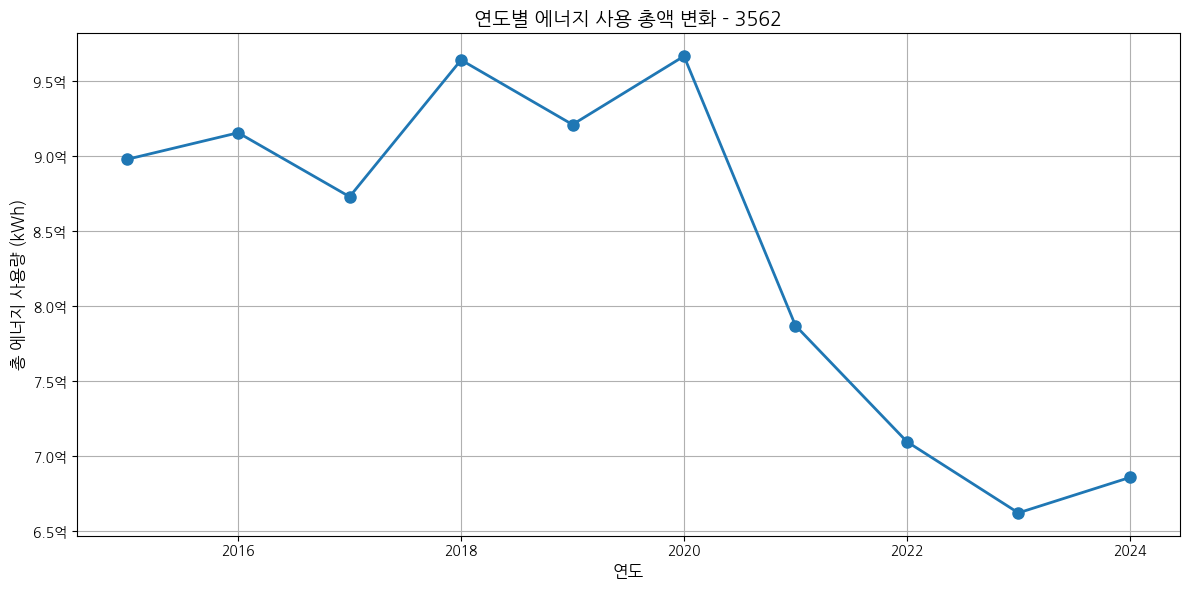

In [22]:
# 에너지 컬럼들을 숫자로 변환
df['EUS'] = pd.to_numeric(df['EUS'], errors='coerce').fillna(0)
df['GUS'] = pd.to_numeric(df['GUS'], errors='coerce').fillna(0)
df['WUS'] = pd.to_numeric(df['WUS'], errors='coerce').fillna(0)
df['HUS'] = pd.to_numeric(df['HUS'], errors='coerce').fillna(0)

# 한글 컬럼에도 숫자로 저장
df['전기사용량'] = df['EUS']
df['가스사용량'] = df['GUS']
df['수도사용량'] = df['WUS']
df['지역난방사용량'] = df['HUS']

# 총 에너지 사용량 계산 (전기+가스+수도+지역난방)
# 단위: kWh
df['총_에너지_사용량'] = df['EUS'] + df['GUS'] + df['WUS'] + df['HUS']

# 연도별로 그룹화해서 합계 구하기
yearly_summary = df.groupby('연도').agg({
    '전기사용량': 'sum',
    '가스사용량': 'sum',
    '수도사용량': 'sum',
    '지역난방사용량': 'sum',
    '총_에너지_사용량': 'sum'
})

print("\n<연도별 에너지 사용량 (단위: kWh)>")
print(yearly_summary.to_string(float_format=lambda x: f'{x:,.0f}'))

# 그래프용 데이터
yearly_total = df.groupby('year')['총_에너지_사용량'].sum()

# 선 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(yearly_total.index, yearly_total.values, marker='o', linewidth=2, markersize=8)
plt.title('연도별 에너지 사용 총액 변화 - 3562', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('총 에너지 사용량 (kWh)', fontsize=12)

# y축 숫자 포맷
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e8:.1f}억'))

plt.grid(True)
plt.tight_layout()
plt.savefig('연도별_에너지_사용량_3562.png', dpi=300)
plt.show()

**3-2: 계절별 가스 사용량 평균 시각화**


<계절별 가스 사용량 평균 (단위: kWh)>
봄: 29,027
여름: 7,033
가을: 9,381
겨울: 41,643


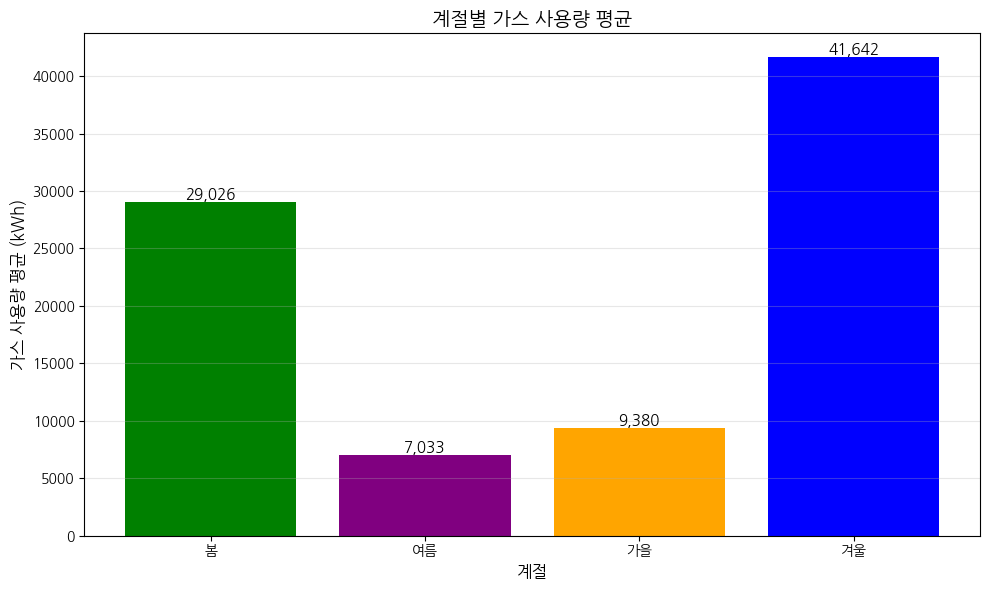

In [23]:
# 계절별로 그룹화해서 가스 사용량 평균 구하기
seasonal_gas = df.groupby('계절')['가스사용량'].mean()

# 계절 순서대로 정렬
season_order = ['봄', '여름', '가을', '겨울']
seasonal_gas = seasonal_gas.loc[season_order]

print("\n<계절별 가스 사용량 평균 (단위: kWh)>")
for season, value in seasonal_gas.items():
    print(f"{season}: {value:,.0f}")

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
colors = ['green', 'purple', 'orange', 'blue']
bars = plt.bar(seasonal_gas.index, seasonal_gas.values, color=colors)
plt.title('계절별 가스 사용량 평균', fontsize=14)
plt.xlabel('계절', fontsize=12)
plt.ylabel('가스 사용량 평균 (kWh)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# 막대 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}',
             ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.savefig('계절별_가스_사용량.png', dpi=300)
plt.show()

**4: 데이터 분석 결과**

In [13]:
print("\n=== 문제 4: 분석용 통계 정보 ===")

# 연도별 총 에너지 사용량 (kWh 단위)
yearly_total_kwh = df.groupby('연도')['총_에너지_사용량'].sum()

print("\n1. 연도별 총 에너지 사용량 (kWh):")
for year, total in yearly_total_kwh.items():
    print(f"  {year}년: {total:,.0f} kWh ({total/1e8:.2f}억 kWh)")

print("\n2. 연도별 증감률:")
for i in range(1, len(yearly_total_kwh)):
    prev_value = yearly_total_kwh.iloc[i-1]
    curr_value = yearly_total_kwh.iloc[i]
    change_rate = ((curr_value - prev_value) / prev_value) * 100
    year = yearly_total_kwh.index[i]

    if change_rate > 0:
        print(f"  {year}년: +{change_rate:.2f}% (증가)")
    else:
        print(f"  {year}년: {change_rate:.2f}% (감소)")

print(f"\n3. 최대 사용 연도: {yearly_total_kwh.idxmax()}년")
print(f"   사용량: {yearly_total_kwh.max():,.0f} kWh ({yearly_total_kwh.max()/1e8:.2f}억 kWh)")

print(f"\n4. 최소 사용 연도: {yearly_total_kwh.idxmin()}년")
print(f"   사용량: {yearly_total_kwh.min():,.0f} kWh ({yearly_total_kwh.min()/1e8:.2f}억 kWh)")

# 전체 기간 변화
first_year = yearly_total_kwh.iloc[0]
last_year = yearly_total_kwh.iloc[-1]
total_change = ((last_year - first_year) / first_year) * 100

print(f"\n5. 2015년 → 2024년 전체 변화:")
print(f"   {first_year/1e8:.2f}억 kWh → {last_year/1e8:.2f}억 kWh")
if total_change > 0:
    print(f"   변화율: +{total_change:.2f}% (증가)")
else:
    print(f"   변화율: {total_change:.2f}% (감소)")

print("\n※ 단위 설명:")
print("  - kWh (킬로와트시): 에너지 사용량의 표준 단위")
print("  - 1억 kWh = 100,000,000 kWh")


=== 문제 4: 분석용 통계 정보 ===

1. 연도별 총 에너지 사용량 (kWh):
  2015년: 897,855,524 kWh (8.98억 kWh)
  2016년: 915,633,818 kWh (9.16억 kWh)
  2017년: 872,998,469 kWh (8.73억 kWh)
  2018년: 964,152,927 kWh (9.64억 kWh)
  2019년: 921,090,809 kWh (9.21억 kWh)
  2020년: 966,681,379 kWh (9.67억 kWh)
  2021년: 787,096,734 kWh (7.87억 kWh)
  2022년: 709,701,736 kWh (7.10억 kWh)
  2023년: 662,237,539 kWh (6.62억 kWh)
  2024년: 685,850,871 kWh (6.86억 kWh)

2. 연도별 증감률:
  2016년: +1.98% (증가)
  2017년: -4.66% (감소)
  2018년: +10.44% (증가)
  2019년: -4.47% (감소)
  2020년: +4.95% (증가)
  2021년: -18.58% (감소)
  2022년: -9.83% (감소)
  2023년: -6.69% (감소)
  2024년: +3.57% (증가)

3. 최대 사용 연도: 2020년
   사용량: 966,681,379 kWh (9.67억 kWh)

4. 최소 사용 연도: 2023년
   사용량: 662,237,539 kWh (6.62억 kWh)

5. 2015년 → 2024년 전체 변화:
   8.98억 kWh → 6.86억 kWh
   변화율: -23.61% (감소)

※ 단위 설명:
  - kWh (킬로와트시): 에너지 사용량의 표준 단위
  - 1억 kWh = 100,000,000 kWh
